## Model
In this notebook I've written out the most basic version of the network from today's task. Try running the entire thing and seeing the network train then 

In [25]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.optimizers import SGD
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from data import load_data

In [15]:
# Data parameters
classes = 10
rows, cols = 28, 28
input_shape = (rows,cols,1)

In [16]:
# Load data
(X_train, y_train, X_test, y_test) = load_data()

In [17]:
# Model parameters
hiddens = 128
batch_size = 128
epochs = 20

In [32]:
# Model architecture -- this is where you will make changes to the structure of the network itself
inp = Input(shape=input_shape, name='Input')
flat = Flatten(name = 'Flatten_input')(inp)
hidden_1 = Dense(hiddens, activation='sigmoid', name='Hidden_layer_1')(flat)
# perhaps you could add a layer here?
hidden_2 = Dense(hiddens, activation='sigmoid', name='Hidden_layer_2')(hidden_1)
out = Dense(classes, activation='softmax', name='Output_layer')(hidden_2)
model = Model(inputs=inp, outputs=out)

In [33]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
Flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
Hidden_layer_1 (Dense)       (None, 128)               100480    
_________________________________________________________________
Hidden_layer_2 (Dense)       (None, 128)               16512     
_________________________________________________________________
Output_layer (Dense)         (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


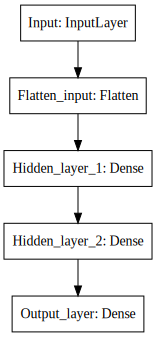

In [34]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [24]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(),
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=1)

print("Accuracy:", score[1])

Train on 13000 samples, validate on 5724 samples
Epoch 1/20
13000/13000 [==============================] - 1s 41us/step - loss: 2.3392 - acc: 0.1906 - val_loss: 2.2625 - val_acc: 0.2483
Epoch 2/20
13000/13000 [==============================] - 0s 25us/step - loss: 2.2475 - acc: 0.3442 - val_loss: 2.2354 - val_acc: 0.3877
Epoch 3/20
13000/13000 [==============================] - 0s 25us/step - loss: 2.2201 - acc: 0.4401 - val_loss: 2.2067 - val_acc: 0.5561
Epoch 4/20
13000/13000 [==============================] - 0s 25us/step - loss: 2.1920 - acc: 0.5600 - val_loss: 2.1775 - val_acc: 0.5755
Epoch 5/20
13000/13000 [==============================] - 0s 25us/step - loss: 2.1614 - acc: 0.6246 - val_loss: 2.1460 - val_acc: 0.6268
Epoch 6/20
13000/13000 [==============================] - 0s 26us/step - loss: 2.1285 - acc: 0.6632 - val_loss: 2.1110 - val_acc: 0.6801
Epoch 7/20
13000/13000 [==============================] - 0s 25us/step - loss: 2.0926 - acc: 0.6958 - val_loss: 2.0726 - val_acc: